# Time Series Forecasting

**scope**: 
- 시간에 대한 함수, 시간에 따른 변화에 주안,  인과 관계X
- Data Wrangling for time-series in Python
- self projecting(o), cause and effect(X)
- uni-variate(o), multi-variate(x)
- Time-series Basics; seasonality, trend, residual, statrionary/non-stationary process
- Time-series forecasting using ARIMA (Box Jenkins Approach, ACF, PACF)

**requirements**:
- python 2.7 or 3
- statsmodel 0.8.0   
(**anaconda user** -> `conda install -c taugspurger statsmodels=0.8.0` 참고: https://anaconda.org/search?q=statsmodels%20   
// **pip user** -> `pip install statsmodels==0.8.rc1` )
 
- (Jupyter Kernel) (http://stackoverflow.com/questions/28831854/how-do-i-add-python3-kernel-to-jupyter-ipython)

**reference**:   
[1] [Seasonal ARIMA with Python](http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/)  
[2] [A Complete Tutorial on Time Series Modeling in R](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)  
[3] [A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)  
[4] [데이터 사이언스 스쿨/ 시계열 분석](https://www.datascienceschool.net/view-notebook/e0c935b3f55c4302b0fb0c93986562cd/)  
[5] [시계열 데이터의 통계적 분석 방법](https://www.google.co.kr/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjJkr3qqvDQAhVIyLwKHUgSDKoQFgggMAA&url=https%3A%2F%2Fbigdata.kookmin.ac.kr%2F%3Fmodule%3Dfile%26act%3DprocFileDownload%26file_srl%3D351%26sid%3D43ea21693d9f550e5e39869d5ce52adc&usg=AFQjCNFeXfnfSgzHQHDP85VZTBUvi4wy0Q&sig2=uZvEKrxxd_rr4Gv4lOB7Yw)




## 1. 시계열 데이터 이해

시계열 데이터 분석을 위해서는 기본적으로 시계열 데이터의 요소 및 정상/비정상 과정에 대한 이해가 필요하다.

![](figure/TS_pattern.png)
*(출처: [5])*

### 1.1. 시계열 데이터 요소 

- **추세(Trend)**: 장기적으로 나타나는 변동 패턴
- **계절성(Seasonal)**: 주,월,분기,반기 단위 등 이미 알려진 시간의 주기로 나타나는 패턴 
- **주기(Cyclic)**: 최소 2 년 단위로 나타나는 고정된 기간이 아닌 장기적인 변동
- **랜덤요소 (random/residual/remainder)**

![](https://anomaly.io/wp-content/uploads/2015/12/time-series-decomposition-seasonal-trend.png)

![](https://anomaly.io/wp-content/uploads/2015/12/multiplicative-decompose.png)



### 1.2. 정상 및 비정상 과정 모형 Staionary & Non-Stationary 


일반적으로 시계열 분석의 용이성을 위해 아래와 같이 비정상과정 모형(𝑌 )에 따르는 시계열 데이터 "
또한 추정 가능한 결정론적 추세함수 ($𝑓_{t}$ , trend) 와 확률 정상과정($ 𝑋_{t} $)의 합으로 가정하고 분석한다.

$$\begin{align*} & y_{t}\sim f_{\left( t\right) }+X_{t}\end{align*} $$

따라서 시계열 데이터 분석에서 정상과정 모형의 특성 및 분석방법들을 이해하는 것이 우선적으로 요구된다. 다음은 정상 시계열 모형과 비정상 시계열 모형의 특징 비교이다.

[상세설명 참고](https://www.datascienceschool.net/view-notebook/0ddd47967585403ab8b4cb60d0e420f6/)

** i.시간 추이에 따른 평균값의 불변여부**  
정상과정 - 평균은 시간에 따라 변화하는 함수가 아니다.;일정한 평균 else 비정상과정

$$ E(y_{t}) = \mu $$

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png)

** ii.시간추이에 따른 분산의 불변여부**  
정상과정 - 분산은 시간에 따라 변화하는 함수가 아니다.;일정한 분산  else 비정상과정

$$ var(y_{t}) = \sigma^{2} $$


![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png)

**C.시점간의 공분산**  
공분산은 t가 아닌 s에 의존함
$$ cov(y_{t}, y_{t+s}) = cov(y_{t}, y_{t-s}) = \gamma_{s} $$
$$ cov(X,Y) = E((X-\mu)(Y-\upsilon))  $$

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png)


본 장에서 소개하는 통계적 시계열 추정 모형들은 시계열 데이터를 정상화시킨 모형 위에서 설계되어 있으므로, 필수적으로 데이터를 정상화 시키는 과정이 필요하다.  

## 2. 시계열 데이터 분석 Framework

일반적으로 아래와 같은 방법으로 시계열 데이터 분석을 진행한다.  
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/flowchart.png)

또는 [링크: 확률 과정 모형을 추정하는 방법](https://www.datascienceschool.net/view-notebook/e4b52228ac5749418d51409fdc4f9cef/)와 같은 절차를 통해 확률모형을 추정할 수 있다.

### 2.0 Pandas 기초

본 절은 [6]Python for Finance 의 내용을 기초로 함.  

[참고: pandas cheat sheet](https://s3.amazonaws.com/quandl-static-content/Documents/Quandl+-+Pandas,+SciPy,+NumPy+Cheat+Sheet.pdf)


In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# create a vector with random numbers
a = np.random.standard_normal((9,4))
print ('>>> a=\n',a.round(6))

# create dataframe
fun_df = pd.DataFrame(a)
print ('>>> fun_df=\n',fun_df)

# create DatetimeIndex objects
dates = pd.date_range('2016-1-1',periods=9,freq='M')
print ('>>> dates=\n',dates)

# set index of df with 'dates'
fun_df.index = dates
print ('>>> fun_df.index=\n',fun_df)

>>> a=
 [[-1.293818  0.272272  0.018758 -0.330164]
 [-0.148685 -0.271431  1.00961   1.913422]
 [ 1.948358  1.06523   2.056629 -0.800756]
 [-0.292714 -0.86246  -0.679134  2.018199]
 [ 1.029699  0.038898  2.516392 -0.033658]
 [ 1.403878 -0.577693 -0.992217 -0.834543]
 [-0.006407  0.632325  1.326125  1.069603]
 [ 1.205666  0.051079  0.494714 -0.014192]
 [-2.080606  0.98777   1.64998  -1.058814]]
>>> fun_df=
           0         1         2         3
0 -1.293818  0.272272  0.018758 -0.330164
1 -0.148685 -0.271431  1.009610  1.913422
2  1.948358  1.065230  2.056629 -0.800756
3 -0.292714 -0.862460 -0.679134  2.018199
4  1.029699  0.038898  2.516392 -0.033658
5  1.403878 -0.577693 -0.992217 -0.834543
6 -0.006407  0.632325  1.326125  1.069603
7  1.205666  0.051079  0.494714 -0.014192
8 -2.080606  0.987770  1.649980 -1.058814
>>> dates=
 DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2

** Basic methods: **

In [4]:
# index values
fun_df.index

# columns 
fun_df.columns

# select via index
fun_df.ix['2016-02-29'] 
fun_df.ix[fun_df.index[1:3]]
fun_df[1:3]

,0,1,2,3
2016-02-29,-0.148685,-0.271431,1.009610,1.913422
2016-03-31,1.948358,1.065230,2.056629,-0.800756


** LAMBDA func, apply()** - [lambda - 참고](https://wikidocs.net/64), [apply - 참고](http://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html)

![](http://nbviewer.jupyter.org/github/h3imdallr/TIL-datascience/blob/master/ipynb_gitHub/images/non-builtin.png)

In [5]:
# apply()
fun_df.apply(lambda x: x**2)

,0,1,2,3
2016-01-31,1.673966,0.074132,0.000352,0.109008
2016-02-29,0.022107,0.073675,1.019312,3.661183
2016-03-31,3.796097,1.134715,4.229723,0.641210
2016-04-30,0.085681,0.743837,0.461223,4.073126
2016-05-31,1.060280,0.001513,6.332228,0.001133
2016-06-30,1.970874,0.333730,0.984494,0.696463
2016-07-31,0.000041,0.399834,1.758607,1.144051
2016-08-31,1.453630,0.002609,0.244742,0.000201
2016-09-30,4.328922,0.975689,2.722433,1.121087


In [6]:
# insert another column (dimension expansion)
fun_df['new'] = np.zeros(9)
fun_df

,0,1,2,3,new
2016-01-31,-1.293818,0.272272,0.018758,-0.330164,0.0
2016-02-29,-0.148685,-0.271431,1.009610,1.913422,0.0
2016-03-31,1.948358,1.065230,2.056629,-0.800756,0.0
2016-04-30,-0.292714,-0.862460,-0.679134,2.018199,0.0
2016-05-31,1.029699,0.038898,2.516392,-0.033658,0.0
2016-06-30,1.403878,-0.577693,-0.992217,-0.834543,0.0
2016-07-31,-0.006407,0.632325,1.326125,1.069603,0.0
2016-08-31,1.205666,0.051079,0.494714,-0.014192,0.0
2016-09-30,-2.080606,0.987770,1.649980,-1.058814,0.0


In [7]:
fun_df.columns = ['A','B','C','D','E']

# sum
fun_df.sum()
fun_df.cumsum()

# mean
fun_df.mean()

# std
fun_df.std()

# numpy universal functions
np.sqrt(fun_df)

# general stats
fun_df.describe()

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


,A,B,C,D,E
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,0.196152,0.148443,0.822317,0.214344,0.0
std,1.325015,0.665340,1.207646,1.174413,0.0
min,-2.080606,-0.862460,-0.992217,-1.058814,0.0
25%,-0.292714,-0.271431,0.018758,-0.800756,0.0
50%,-0.006407,0.051079,1.009610,-0.033658,0.0
75%,1.205666,0.632325,1.649980,1.069603,0.0
max,1.948358,1.065230,2.516392,2.018199,0.0


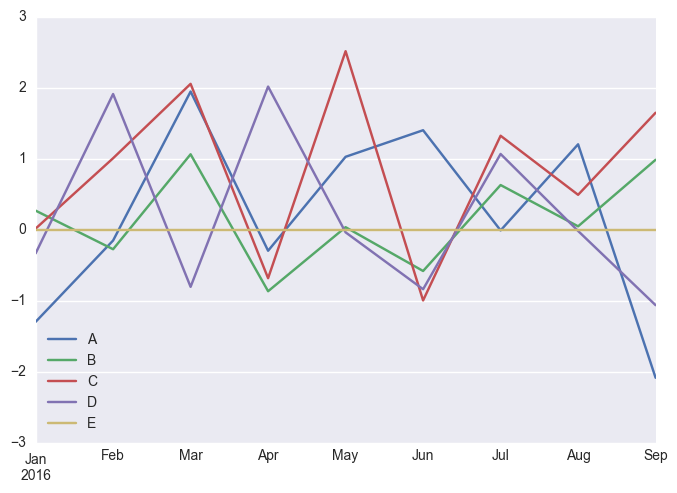

In [8]:
fun_df.plot()
# plt.plot(fun_df)

** Groupby Operations **  

SQL의 group select , 엑셀의 pivot table과 비슷한 기능

In [9]:
fun_df['Quarter'] = ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']
fun_df

,A,B,C,D,E,Quarter
2016-01-31,-1.293818,0.272272,0.018758,-0.330164,0.0,Q1
2016-02-29,-0.148685,-0.271431,1.009610,1.913422,0.0,Q1
2016-03-31,1.948358,1.065230,2.056629,-0.800756,0.0,Q1
2016-04-30,-0.292714,-0.862460,-0.679134,2.018199,0.0,Q2
2016-05-31,1.029699,0.038898,2.516392,-0.033658,0.0,Q2
2016-06-30,1.403878,-0.577693,-0.992217,-0.834543,0.0,Q2
2016-07-31,-0.006407,0.632325,1.326125,1.069603,0.0,Q3
2016-08-31,1.205666,0.051079,0.494714,-0.014192,0.0,Q3
2016-09-30,-2.080606,0.987770,1.649980,-1.058814,0.0,Q3


In [10]:
groups = fun_df.groupby('Quarter')
groups #groupby 객체임

In [11]:
groups.mean()
groups.max()
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

두개의 열을 동시에 기준으로 하는 그룹 지정도 가능

In [12]:
fun_df['Odd_Even'] = ['Odd','Even','Odd','Even','Odd','Even','Odd','Even','Odd']
groups = fun_df.groupby(['Quarter','Odd_Even'])
groups.size()
groups.mean()

A         B         C         D    E
Quarter Odd_Even                                             
Q1      Even     -0.148685 -0.271431  1.009610  1.913422  0.0
        Odd       0.327270  0.668751  1.037693 -0.565460  0.0
Q2      Even      0.555582 -0.720077 -0.835676  0.591828  0.0
        Odd       1.029699  0.038898  2.516392 -0.033658  0.0
Q3      Even      1.205666  0.051079  0.494714 -0.014192  0.0
        Odd      -1.043507  0.810047  1.488052  0.005395  0.0

### 2.1 EDA; 시계열 데이터 확인하기

In [13]:
import datetime
from dateutil.relativedelta import relativedelta

import statsmodels
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

* __Wrangling__: 
dropna, column name, DF slicing, date_range, type conversion

In [14]:
df = pd.read_csv('data/portland-oregon-average-monthly.csv', index_col='Month')

#preprocessing
df.dropna(axis=0, inplace=True)
df.columns = ['ridership']
print (df.head(),'\n ... \n', df.tail() )

df = df.ix[:-1]
print (df.tail())

        ridership
Month            
1960-01       648
1960-02       646
1960-03       639
1960-04       654
1960-05       630 
 ... 
                                                    ridership
Month                                                       
1969-03                                                 1419
1969-04                                                 1432
1969-05                                                 1394
1969-06                                                 1327
Portland Oregon average monthly bus ridership (...     n=114
        ridership
Month            
1969-02      1425
1969-03      1419
1969-04      1432
1969-05      1394
1969-06      1327


In [15]:
#ERROR --> index type should be 'datetime'
# df.plot() 

* change df.index as datetime object:

In [16]:
# OPTION(1): to_datetime()
df.index = pd.to_datetime(df.index) 
type(df.index); print(df.head(),'\n ... \n',df.tail())

           ridership
Month               
1960-01-01       648
1960-02-01       646
1960-03-01       639
1960-04-01       654
1960-05-01       630 
 ... 
            ridership
Month               
1969-02-01      1425
1969-03-01      1419
1969-04-01      1432
1969-05-01      1394
1969-06-01      1327


In [17]:
# OPTION(2): date_range()
df.index = pd.date_range("1960-01","1969-06",freq="MS")
type(df.index); print(df.head(),'\n ... \n',df.tail())

           ridership
1960-01-01       648
1960-02-01       646
1960-03-01       639
1960-04-01       654
1960-05-01       630 
 ... 
            ridership
1969-02-01      1425
1969-03-01      1419
1969-04-01      1432
1969-05-01      1394
1969-06-01      1327


In [18]:
# DF time slicing with datetime
time_window_l = datetime.datetime(1960, 3,1)
time_window_r = datetime.datetime(1961, 7,1)

temp_df = df[
    (df.index >= time_window_l)
    & (df.index <= time_window_r)]
# print (temp_df)

temp_df = df[:time_window_l]
# print (temp_df)

* change type of dataframe's column

In [19]:
df['ridership'] = df['ridership'].astype(int)
print (df.dtypes)
# OR, alternatively, 
# df['ridership'] = df['ridership'].apply(lambda x: int(x))
# df.dtypes

ridership    int64
dtype: object


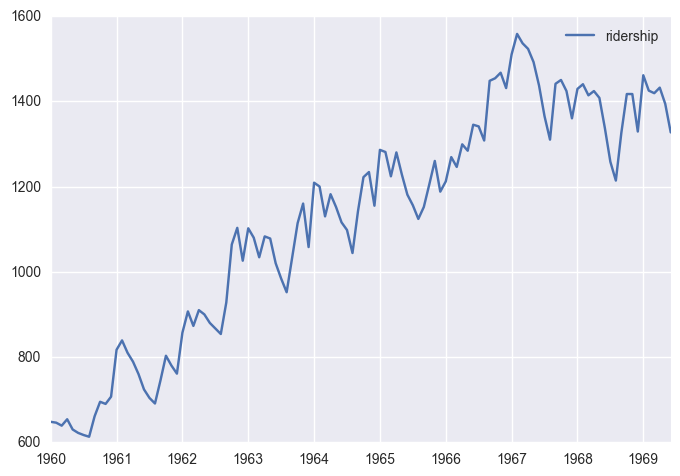

In [20]:
df.plot()
# df.plot(figsize=(12,8), title = 'Montly Ridership', fontsize=14)

#### Seasonal Decomposition (STL)

남은 residual value를 추출함으로써, time-independent한 time-series를 뽑음

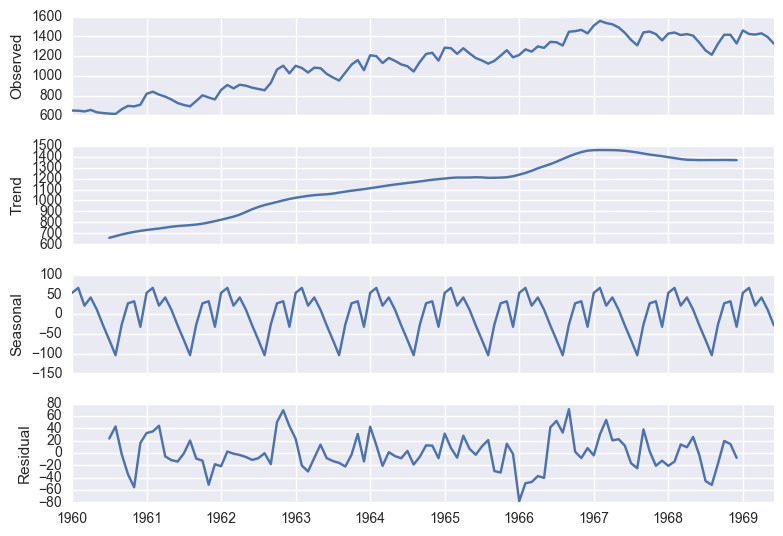

In [21]:
decomposition = seasonal_decompose(df['ridership'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()

Seasonal Trend Decomposition (STL) 활용:
- Anomaly Deteciton (residual활용)
- Stationarize 
- 시계열 패턴 비교 (예시, 아래)

![](figure/STL_example.png)

### 2.2 시계열 데이터 정상화 하기

### 정상성 확인 stationarity check
일반적으로 데이터가 stationary한 경우는 거의 없음. 
정상성을 Test하기 위해서 두가지 방법 사용   

**(1) 눈으로 직관적 확인 ~ STL, Rolling statistics(moving average)    
(2) Dickey-FUller test [링크](https://www.datascienceschool.net/view-notebook/ebb638fc880145b9adeef8dfa630f067/)  **

아래는  Dickey-Fuller test 와 더불어  trend를 추출하는 방법중 하나인 rolling statistics를 이용해서 동시에 정상성을 검사하는 방법이다

In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(10, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


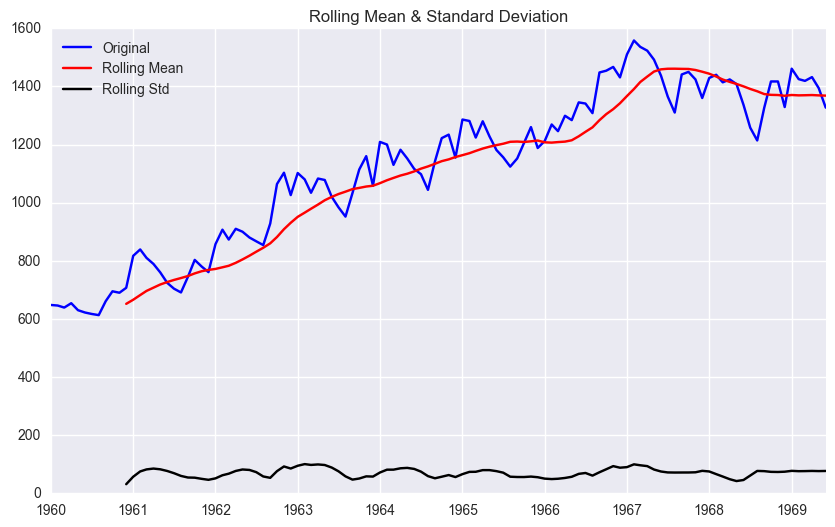

<Results of Dickey-Fuller Test>
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [23]:
test_stationarity(df['ridership'])

* Judgment:   
(null-hypothesis: TS is non-stationary)  
p-value < 0.05: reject null-hypothesis --> Stationary  
p-value > 0.05: accept --> non-Stationary  

### 정상화 Stationarize

비정상 확률과정을 정상 확률 과정으로 변환하는 방법은 여러가지 [[1]](http://people.duke.edu/~rnau/whatuse.htm), [[2]](https://www.datascienceschool.net/view-notebook/3f485c426a4b49fc9de95a02137ca6b4/)가 있으며, 주어진 데이터에 따라 가장 효율적인 방법이 다르거나 혼합하여 사용한다. (상세내용 링크참조)
여기서는 짧게 세가지에 대해서 소개한다. 
- **차분(differencing)**: 1차차분. Trend 제거하는데 용이 $\Delta y_{t} = y_{t} - y_{t-1}$
- **로그변환(lograithm)**: 표준편차가 자료의 크기에 비례하여 증가할때
- **Box-Cox 변환**: 정규분포가 아닌 자료를 정규분포로 변환. 


여기서는 차분을 이용하여 정상화를 한다.



/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


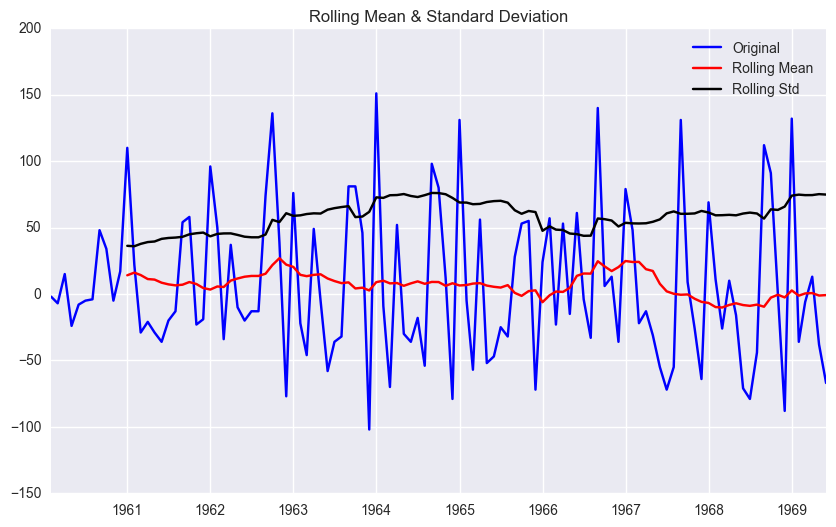

<Results of Dickey-Fuller Test>
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [24]:
df['first_difference'] = df['ridership'] - df['ridership'].shift(1)  
# Or Alternatively, 
# df.diff().plot()
test_stationarity(df.first_difference.dropna(inplace=False))

좀더 나은 수준의 정상화를 위해, 도한 seasonal 패턴을 좀더 명확히 보고 싶고, long-term에서도 잘 남아있게 하기 위해서 seasonaly differencing 을 적용한다.

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


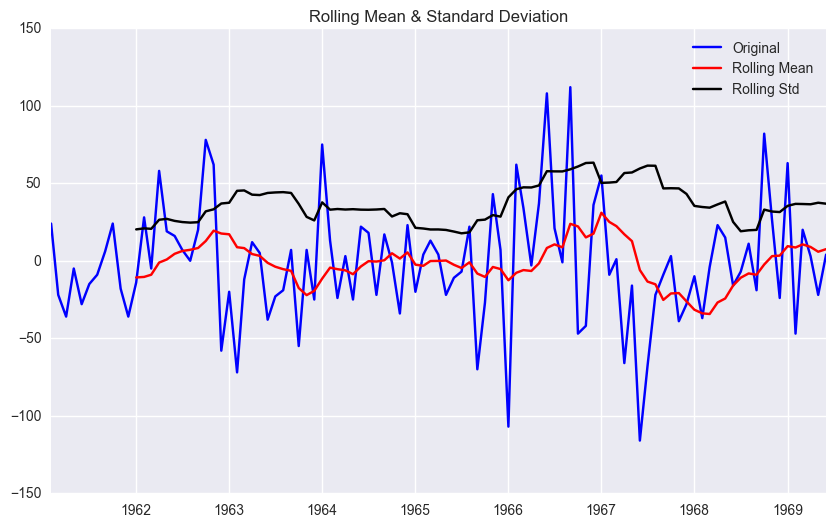

<Results of Dickey-Fuller Test>
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [25]:
df['seasonal_first_difference'] = df['first_difference'] - df['first_difference'].shift(12)  
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))

# Else: 
# df['log_first_difference'] = df.riders_log - df.riders_log.shift(1)
# df['seasonal_difference'] = df.riders - df.riders.shift(12)  
# df['log_seasonal_difference'] = df.riders_log - df.riders_log.shift(12) 
# df['log_seasonal_first_difference'] = df.log_first_difference - df.log_first_difference.shift(12)

p-value가 더 높아진 점에서 seasonal first difference를 통해 최종적으로 data를 정상화 시켰다고 판단한다.추가적으로 로그변환(`df[~] = np.log(df[~])`)도 할 수 있으나, 본 경우에서는 분석후 크게 나아지지 않았다.
또한 추가로 추세를 추정하여 제거하는 기법[(링크: 결정론적 추세/다항식 추세/ 계절성 추세 추정)](https://www.datascienceschool.net/view-notebook/240b62a8927043c79b5384536e42f99d/)들이 있으나, 충분히 정상화 되었다고 판단하고 본 분석에서는 소개하지 않는다.

 ### 2.3 모수추정;  최적 파라미터(모형차수) 도출

### ARIMA 모델의 개념

- 출처: [데이터 사이언스 스쿨](https://www.datascienceschool.net/view-notebook/d5226389a8414583a45fb47e1e1cf6fb/)

** a. 정상과정 확률 모형(1/2) - General Linear Process Model **  
정상확률 과정에서 가장 일반적으로 사용되는 모형은 일반선형 확률 과정 모형(General Linear Process Model)이다. 해당 모형은 시계열이 [가우시안 백색잡음](https://www.datascienceschool.net/view-notebook/6b963e771dc54f8c8cb23437274a86d6/) ($e_{t}$)의 현재값과 과거값들의 선형조합으로 이루어져 있다고 가정. $\psi $ 는 가중계수(weight coefficient). 

$$ Y_t = e_t + \psi_1 e_{t-1}  + \psi_2 e_{t-2}  + \psi_1 e_{t-3}  + \cdots $$

위 모형의 블럭 다이어그램은 다음과 같다.

![](figure/glpm.png)

** b. 정상과정 확률 모형 (2/2) MA, AR, ARMA **

일반 선형 확률 과정 모형은 계수의 특성에 따라 다음과 같은 하위 모형으로 분류된다.

- **MA (Moving Average) 모형**: 백색 잡음의 현재 값과 과거 값 중 유한(finite)개의 값에 대한 선형 가중합(linear weighted summation)으로 나타나는 확률 과정.q차수에 대해서 MA(q)로 표기  

$$ Y_t = e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots - \theta_q e_{t-q} $$
![](figure/ma.png)

- **AR (Auto-Regressive) 모형**: 자기 자신의 과거값에 의존적인 모형. 백색 잡음의 현재값과 자기 자신의 과거값의 선형 가중합으로 이루어진 정상 확률 모형. p차수의 AR모형: AR(p)

$$ Y_t = \phi_1 Y_{t-1}  + \phi_2 Y_{t-2}  + \cdots + \phi_p Y_{t-p}  + e_t $$

![](figure/ar.png)

이 모형이 선형확률과정을 따르는 것은 아래와 같이 증명 할 수 있다.   


$$
\begin{eqnarray}
Y_t 
&=& \phi Y_{t-1} + e_t \\
&=& \phi \left( \phi Y_{t-2} + e_{t-1} \right) + e_t \\
&=& \phi^2 Y_{t-2} + \phi e_{t-1} + e_t \\
&=& \phi^2  \left( \phi Y_{t-3} + e_{t-2} \right)  + \phi e_{t-1} + e_t \\
&=& \phi^3 Y_{t-3} + \phi^2 e_{t-2}  + \phi e_{t-1} + e_t \\
&\vdots& \\
&=& e_t + \phi e_{t-1} + \phi^2 e_{t-2} + \phi^3 e_{t-3} + \cdots  \\
\end{eqnarray}
$$

- **ARMA (Auto-Regressive Moving Average) 모형**: ARMA(p,q) 모형은 AR(p) 모형과 MA(q) 모형의 특징을 모두 가지는 모형을 말함.  

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + e_t - \theta_1 e_{t-1} - \theta_2 e_{t-2} \cdots  - \theta_q e_{t-q} $$


** c. 비정상과정확률모형 -  ARIMA **

 비정상 과정 모형 중 가장 대표적인 모형으로,  ARMA 모형을 누적한 모형이다. 시계열  $Y_{t}$ 을 차분한 결과로 만들어진 시계열 $\nabla Y_t = Y_t - Y_{t-1}$  이 ARMA 모형을 따르면 원래의 시계열 $Y_{t}$ 를 ARIMA(Autoregressive Integrated Moving Average) 모형이라고 한다.

만약  $d$ 번 차분한 후에야 시계열  $\nabla Y_t$ 가 ARMA(p,q) 모형을 따른다면 적분 차수(order of integration)가  $d$ 인 ARIMA 모형으로 ARIMA(p, d, q)로 표기한다.  $q=0$ 인 경우에는 ARI(p,d), $p=0$ 인 경우에는 IMA(d,q)로 표기한다.


### ARIMA 모형 차수 결정  

앞서 설명한 ARIMA의 p, d, q 모형차수는 아래와 같은 방법으로 결정 할 수 있다. [(상세참조)](https://www.datascienceschool.net/view-notebook/b39ccd2da3e64d6e91981e23e01816c4/) 

- **Augmented Dickey-Fuller 검정** : d
- **자기상관계수 함수(ACF)**: q
- **편자기상관계수 함수(PACF)** : p

| 모형        | ACF  | PACF  |
| :-------: |:-------------:| :-------------:|
| AR(p)| 지수함수적으로 감소하거나 점차 진폭이 축소되는 사인 곡선의 파동을 나타내거나 또는 양쪽모두 나타남 (시차가 증가함에 따라0 으로 급속히 접근) |p 의 시차까지 유의성 있는 값을 나타내고 이후 소멸함|
| MA(q)| q 의 시차까지 유의성 있는 값을 나타내고 이후 소멸함 | 지수함수적으로 감소하거나 점차진폭이 축소되는 사인 곡선의 파동을 나타내거나 또는 양쪽 모두 나타남 (시차가 증가함에 따라 0 으로급속히접근)|
| ARMA(p,q)| 지수함수적으로 감소하거나 점차 진폭이 축소되는 사인 곡선의 파동을 나타내거나 또는 양쪽 모두 나타남 (시차가 증가함에 따라 0 으로 급속히 접근) | 지수함수적으로 감소하거나 점차 진폭이 축소되는 사인 곡선의 파동을 나타내거나 또는 양쪽 모두 나타남 (시차가 증가함에 따라 0 으로 급속히 접근) |
![](figure/parameter.png)
![ARIMA](figure/ARIMA.png)


본 분석에서는 연단위(12개월) 차이로 정상화 시켜서, Seasonal ARIMA 모델로 분류됨.  
> Seasonal ARIMA 모형은 줄여서 SARIMA라고 하기도 한다. 단순 SARIMA 모형은 각 계절에 따른 독립적인 ARIMA 모형이 합쳐져 있는 모형이다. 기존 ARIMA(p,d,q) 모형에 계절성 주기를 나타내는 차수 s가 추가적으로 필요하기 때문에 SARIMA(P,D,Q,s) 로 표기한다.  
s의 값은 월별 계절성을 나타낼 때는  $s=12$ 가 되고 분기별 계절성을 나타낼 때는  $s=4$ 가 된다

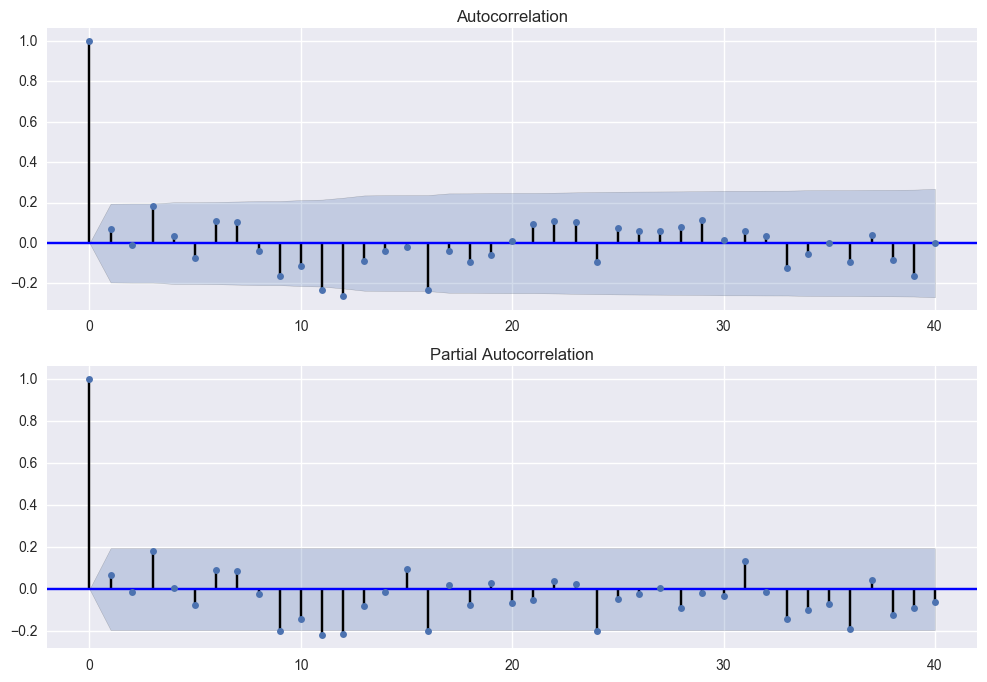

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:],lags=40,ax=ax2) 

위 그래프에서, 1차 차분한 값(first_diff)이 t+1..t+12까지 AR(0), MR(0), d=1.  

12번째에서 +->- SAR(1), SMA(1)

최종적으로 **SARIMA (0,1,0)X(1,1,1,12) **  

SARIMA 모형추정 [예시](https://www.datascienceschool.net/view-notebook/602e62fc1c544ffcb43c2c7e1484dc14/)

### 2.4 모델 수립  
위 단계에서 확정한 모델의 모형차수를 이용하여, (Seasonal) ARIMA 모델을 생성한다

In [27]:
mod = sm.tsa.SARIMAX(df['ridership'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

# import statsmodels.api as sm  
# mod = sm.tsa.statespace.SARIMAX(df['ridership'], trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
# results = mod.fit()

                                 Statespace Model Results                                 
Dep. Variable:                          ridership   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -501.340
Date:                            Thu, 22 Dec 2016   AIC                           1008.680
Time:                                    10:37:58   BIC                           1016.889
Sample:                                01-01-1960   HQIC                          1012.012
                                     - 06-01-1969                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.115      2.816      0.005       0.098       0.549
ma.S.L12      -0.9990      2.489   

## 평가
모형이 훌륭하다면 이 값은 더이상 예측할 수 있는 요소가 전혀 없는 시계열 즉, 가우시안 백색 잡음에 가까운 특성을 보여야 한다.  
백색잡음: 백색 잡음  $e$ 은 확률 과정을 구성하는 모든 개별 확률 변수  $e_{t}$ 들이 서로 독립이고(independent) 동일한 확률 분포를 따르는(identically distributed) 확률 과정을 말한다. 

백색 잡음은 다음과 같은 특성을 만족한다.

- 정상 과정(stictly stationary process)이다.

- 시차(lag)가 0일 경우, 자기공분산은 확률 분포의 분산이 되고 시차가 0이 아닌 경우, 자기공분산은 0이다.  

$$\gamma_l = \begin{cases} \text{Var}[e_t] & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases}$$

- 시차(lag)가 0일 경우, 자기상관계수는 1이 되고 시차가 0이 아닌 경우, 자기상관계수는 0이다.  

$$\rho_l = \begin{cases} 1 & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases}$$
 

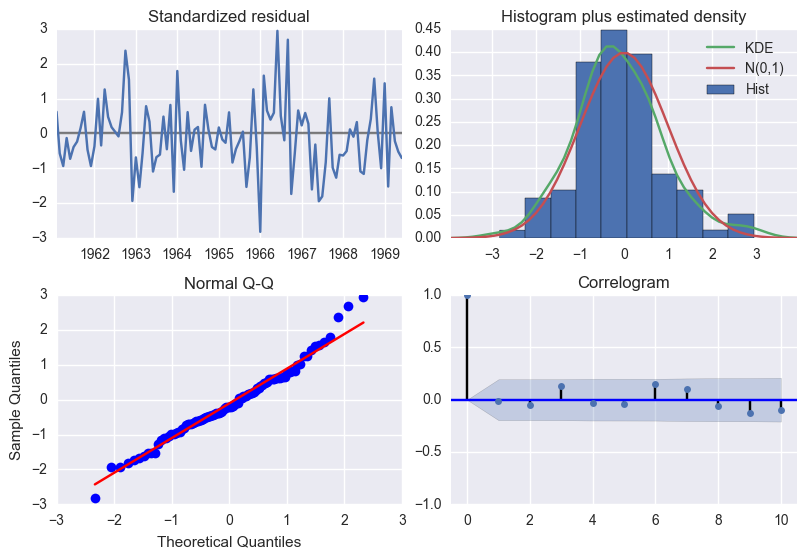

In [28]:
results.plot_diagnostics();
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

### 2.5  시계열 예측

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/statsmodels/base/data.py:551: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(squeezed, index=self.predict_dates)


,ridership,first_difference,seasonal_first_difference,forecast
1968-07-01,1258,-79.0,-7.0,1296.346206
1968-08-01,1214,-44.0,11.0,1258.596774
1968-09-01,1326,112.0,-19.0,1356.836145
1968-10-01,1417,91.0,82.0,1395.808702
1968-11-01,1417,0.0,26.0,1394.657184
1968-12-01,1329,-88.0,-24.0,1339.628128
1969-01-01,1461,132.0,63.0,1424.051451
1969-02-01,1425,-36.0,-47.0,1438.092678
1969-03-01,1419,-6.0,20.0,1407.277891
1969-04-01,1432,13.0,3.0,1427.492444


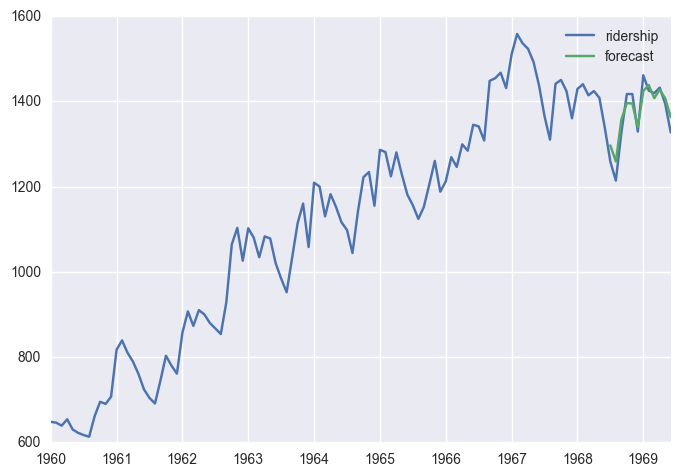

In [29]:
df['forecast'] = results.predict(start = len(df)-12, end= len(df), dynamic= True)  
df[['ridership', 'forecast']].plot()
df[-12:]

예측 기간이 길어질수록 부정확해 질 수 있음 (아래, 24개월)

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/statsmodels/base/data.py:551: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(squeezed, index=self.predict_dates)


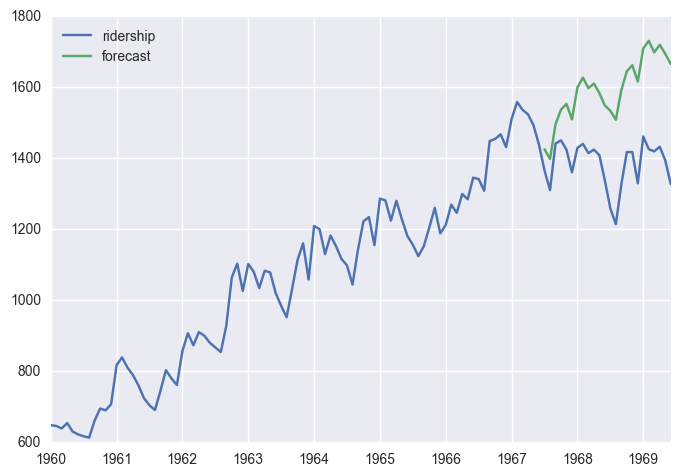

In [30]:
df['forecast'] = results.predict(start = len(df)-24, end= len(df), dynamic= True)  
df[['ridership', 'forecast']].plot()

In [31]:
start = datetime.datetime.strptime("1969-07-01", "%Y-%m-%d") 
# >1982-07-01 00:00:00
date_list = [start + relativedelta(months=x) for x in range(0,12)]
#> 1982/7/1,8/1, ... 1983/6/1

future_df = pd.DataFrame(index=date_list, columns= df.columns)
new_df = pd.concat([df, future_df]) #concatenated  dataframe
# print(new_df.head(),'\n...\n',new_df.tail())

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/statsmodels/base/data.py:551: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(squeezed, index=self.predict_dates)


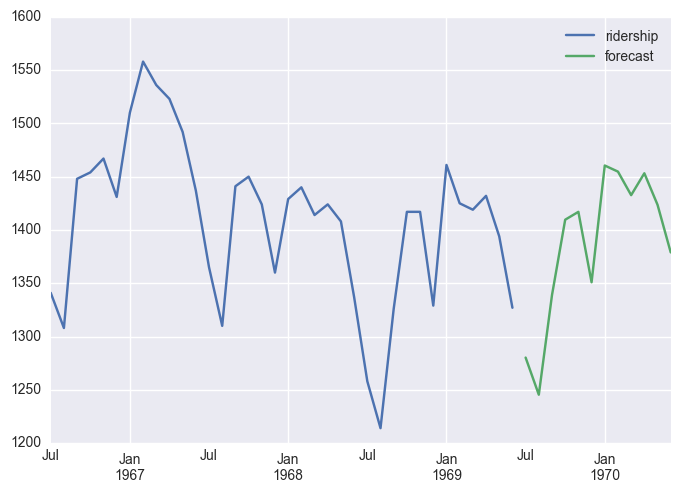

In [32]:
new_df['forecast'] = results.predict(start = len(df), end = len(df)+11, dynamic= True)  
new_df[['ridership', 'forecast']].ix[-48:].plot() 

In [33]:
print (df.forecast[-12:])

1968-07-01    1533.437422
1968-08-01    1507.627276
1968-09-01    1591.243235
1968-10-01    1644.424477
1968-11-01    1661.629774
1968-12-01    1615.434831
1969-01-01    1708.999117
1969-02-01    1730.117397
1969-03-01    1697.643239
1969-04-01    1719.164343
1969-05-01    1693.700319
1969-06-01    1665.040104
Freq: MS, Name: forecast, dtype: float64


## Further Study
- [Seasonal ARIMA 다른 예제](https://www.datascienceschool.net/view-notebook/8c4f6ad9487149ca872374bbbf098e5f/)
- [ARIMAX](https://www.datascienceschool.net/view-notebook/3e70dc86adb841b58736522c491eb770/)
- [LSTM을 이용한 시계열 추정](http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)
- anomaly detection 예제
- [Bayesian Time Series Forecasting](http://multithreaded.stitchfix.com/blog/2016/04/21/forget-arima/)



(End of Doc)